In [ ]:
s = "anagram"
t = "nagaram"
for i in s:
    

# Valid Anagram

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

 

Example 1:

Input: s = "anagram", t = "nagaram"
Output: true
Example 2:

Input: s = "rat", t = "car"
Output: false
 

Constraints:

1 <= s.length, t.length <= 5 * 104
s and t consist of lowercase English letters.
 

Follow up: What if the inputs contain Unicode characters? How would you adapt your solution to such a case?

In [ ]:
        if len(s)!=len(t): return False
        
        cnt = [0]*26
        
        for i in range(len(s)):
            cnt[ord(s[i])-ord('a')]+=1
            cnt[ord(t[i])-ord('a')]-=1
        return not any(cnt)

In [ ]:
    from collections import Counter
	
    if len(t) > len(s):
        return self.isAnagram(t,s)
    
    s_dict = Counter(s)
    count = len(s_dict)
    
    for i in range(len(t)):
        if t[i] in s_dict:
            s_dict[t[i]] -= 1
            if s_dict[t[i]] == 0:
                count = count-1
            if s_dict[t[i]] < 0:
                return False
    
    if count == 0:
        return True
    return False

In [ ]:
def isAnagram(self, s: str, t: str) -> bool:
    H1 = {}
    H2 = {}
    for i in s:
        H1[i] = s.count(i)
    for i in t:
        H2[i] = t.count(i)
    if H1 == H2:
        return True
    else:
        return False

In [ ]:
# faster then 98.01 percent
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        hashmap1 = collections.Counter(s)
        hashmap2 = collections.Counter(t)
        if len(s)!= len(t):
            return False
        for key in hashmap1:
            if key not in hashmap2:
                return False
            elif hashmap1[key]!=hashmap2[key]:
                return False
        return True

In [ ]:
        s1=set(s)
        s2=set(t)
        c1=list(map(lambda x:[x,s.count(x)],s1))
        c1=sorted(c1,key=lambda x:x[0])
        c2=list(map(lambda x:[x,t.count(x)],s2))
        c2=sorted(c2,key=lambda x:x[0])
        eff_listc1=[]
        eff_listc2=[]
        for i in c1:
            if i not in eff_listc1:
                eff_listc1.append(i)
        for i in c2:
            if i not in eff_listc2:
                eff_listc2.append(i)
        if eff_listc1 == eff_listc2:
            return True
        else:
            return False

In [ ]:
#one line code 74 percent 
return sorted(s)==sorted(t)

# Basic Calculator II

Given a string s which represents an expression, evaluate this expression and return its value. 

The integer division should truncate toward zero.

 

Example 1:

Input: s = "3+2*2"
Output: 7
Example 2:

Input: s = " 3/2 "
Output: 1
Example 3:

Input: s = " 3+5 / 2 "
Output: 5
 

Constraints:

1 <= s.length <= 3 * 105
s consists of integers and operators ('+', '-', '*', '/') separated by some number of spaces.
s represents a valid expression.
All the integers in the expression are non-negative integers in the range [0, 231 - 1].
The answer is guaranteed to fit in a 32-bit integer.

In [ ]:
def calculate(self, s: str) -> int:
	s = s.replace(" ", "")
	def op_index(start, end):
		op = -1
		for i in range(end - 1, start - 1, -1):
			if s[i] in ["+", "-"]:
				op = i
				break
			elif s[i] in ["*", "/"] and op < 0:
				op = i
		return op
	def eval(start, end):
		# find the lowest-precedence operator
		op = op_index(start, end)
		if op == -1:
			# literal
			return int(s[start:end])
		else:
			# recursively evaluate sub-expressions
			left = eval(start, op)
			right = eval(op + 1, end)
			if s[op] == "+":
				return left + right
			elif s[op] == "-":
				return left - right
			elif s[op] == "*":
				return left * right
			elif s[op] == "/":
				return left // right
	return eval(0, len(s))

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        return eval(s.replace('/', '//'))

In [ ]:
    def calculate(self, s):
        """
        :type s: str
        :rtype: int
        """
        res, num, sign, last = 0, 0, 1, 0
        for c in s + '+':
            if "0" <= c <= "9":
                num = num * 10 + int(c)
            elif c != ' ':
                if sign == 2:
                    last *= num
                elif sign == 3:
                    last = last // num if last >= 0 else - (-last // num)
                else:
                    last = num * sign
                if c == '+' or c == '-':
                    res += last
                    sign = 1 if c == "+" else -1
                    last = 0
                else:
                    sign = 2 if c == "*" else 3
                num = 0
        return res

In [ ]:
def calculate(self, s: str) -> int:
        res = ""
        for ch in s:
            if ch != " ":
                res+=ch
        n, idx, tmp = len(res), 0, collections.deque()
        while idx < n:
            if res[idx].isdigit():
                cur = ""
                while idx < n and res[idx].isdigit():
                    cur += res[idx]
                    idx += 1
                tmp.append(int(cur))
            else:
                tmp.append(res[idx])
                idx += 1
        ans, sign = 0, 1
        while tmp:
            cur = tmp.popleft()
            if not tmp:
                ans += sign * cur
                break
            elif tmp[0] == "+":
                ans += sign * cur
                sign = 1
                tmp.popleft()
            elif tmp[0] == "-":
                ans += sign * cur
                sign = -1
                tmp.popleft()
            elif tmp[0] == "*":
                tmp.popleft()
                cur2 = tmp.popleft()
                tmp.appendleft(cur * cur2)
            else:
                tmp.popleft()
                cur2 = tmp.popleft()
                tmp.appendleft(cur // cur2)
        return ans

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        curr, prev, res = 0, 0, 0
        sign = '+'
        
        for ch in s + '+':
            if ch.isdigit():
                curr = 10 * curr + int(ch)
            elif ch != ' ':
                if sign == '+' or sign == '-':
                    res += prev
                    prev = curr if sign == '+' else -curr 
                elif sign == '*':
                    prev *= curr
                else:
                    prev = int(prev / curr)
                curr = 0
                sign = ch
        
        return res + prev

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:                
	    
		# add "=" in the end to trigger last operation on last num within loop
        s = s.replace(' ', '') + "="     
        num, op = 0, ""
        res, last = 0, 0                
        for x in s:
            if x.isdigit():
                num = num * 10 + int(x)
            else:
				# when we find new operation sign, we perform operation on last num and last seen operation (op), not the current one
                if op == "":
                    last = num
                elif op == "+":                    
                    res += last
                    last = num                        
                elif op == "-":
                    res += last
                    last = -num                
                elif op == "*":
                    last *= num                        
                elif op == "/":
                    last = int(last / num)
                op, num = x, 0
		
		# add last (last op on last num) to the result
        return res + last

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        tokens = self.parser(s)
        stack = []
        while tokens:
            token = tokens.pop()
            if token == '+':
                stack.append(tokens.pop())
            elif token == '-':
                stack.append(-tokens.pop())
            elif token == '*':
                stack[-1] *= tokens.pop()
            elif token == '/':
                stack[-1] = int(stack[-1] / tokens.pop())
            else:
                stack.append(token)
        return sum(stack)
    
    def parser(self, s):
        s = s.replace(" ", "")
        import re
        tokens = re.split('(\D)', s)
        tokens = [int(t) if t.isdigit() else t for t in reversed(tokens)]
        return tokens

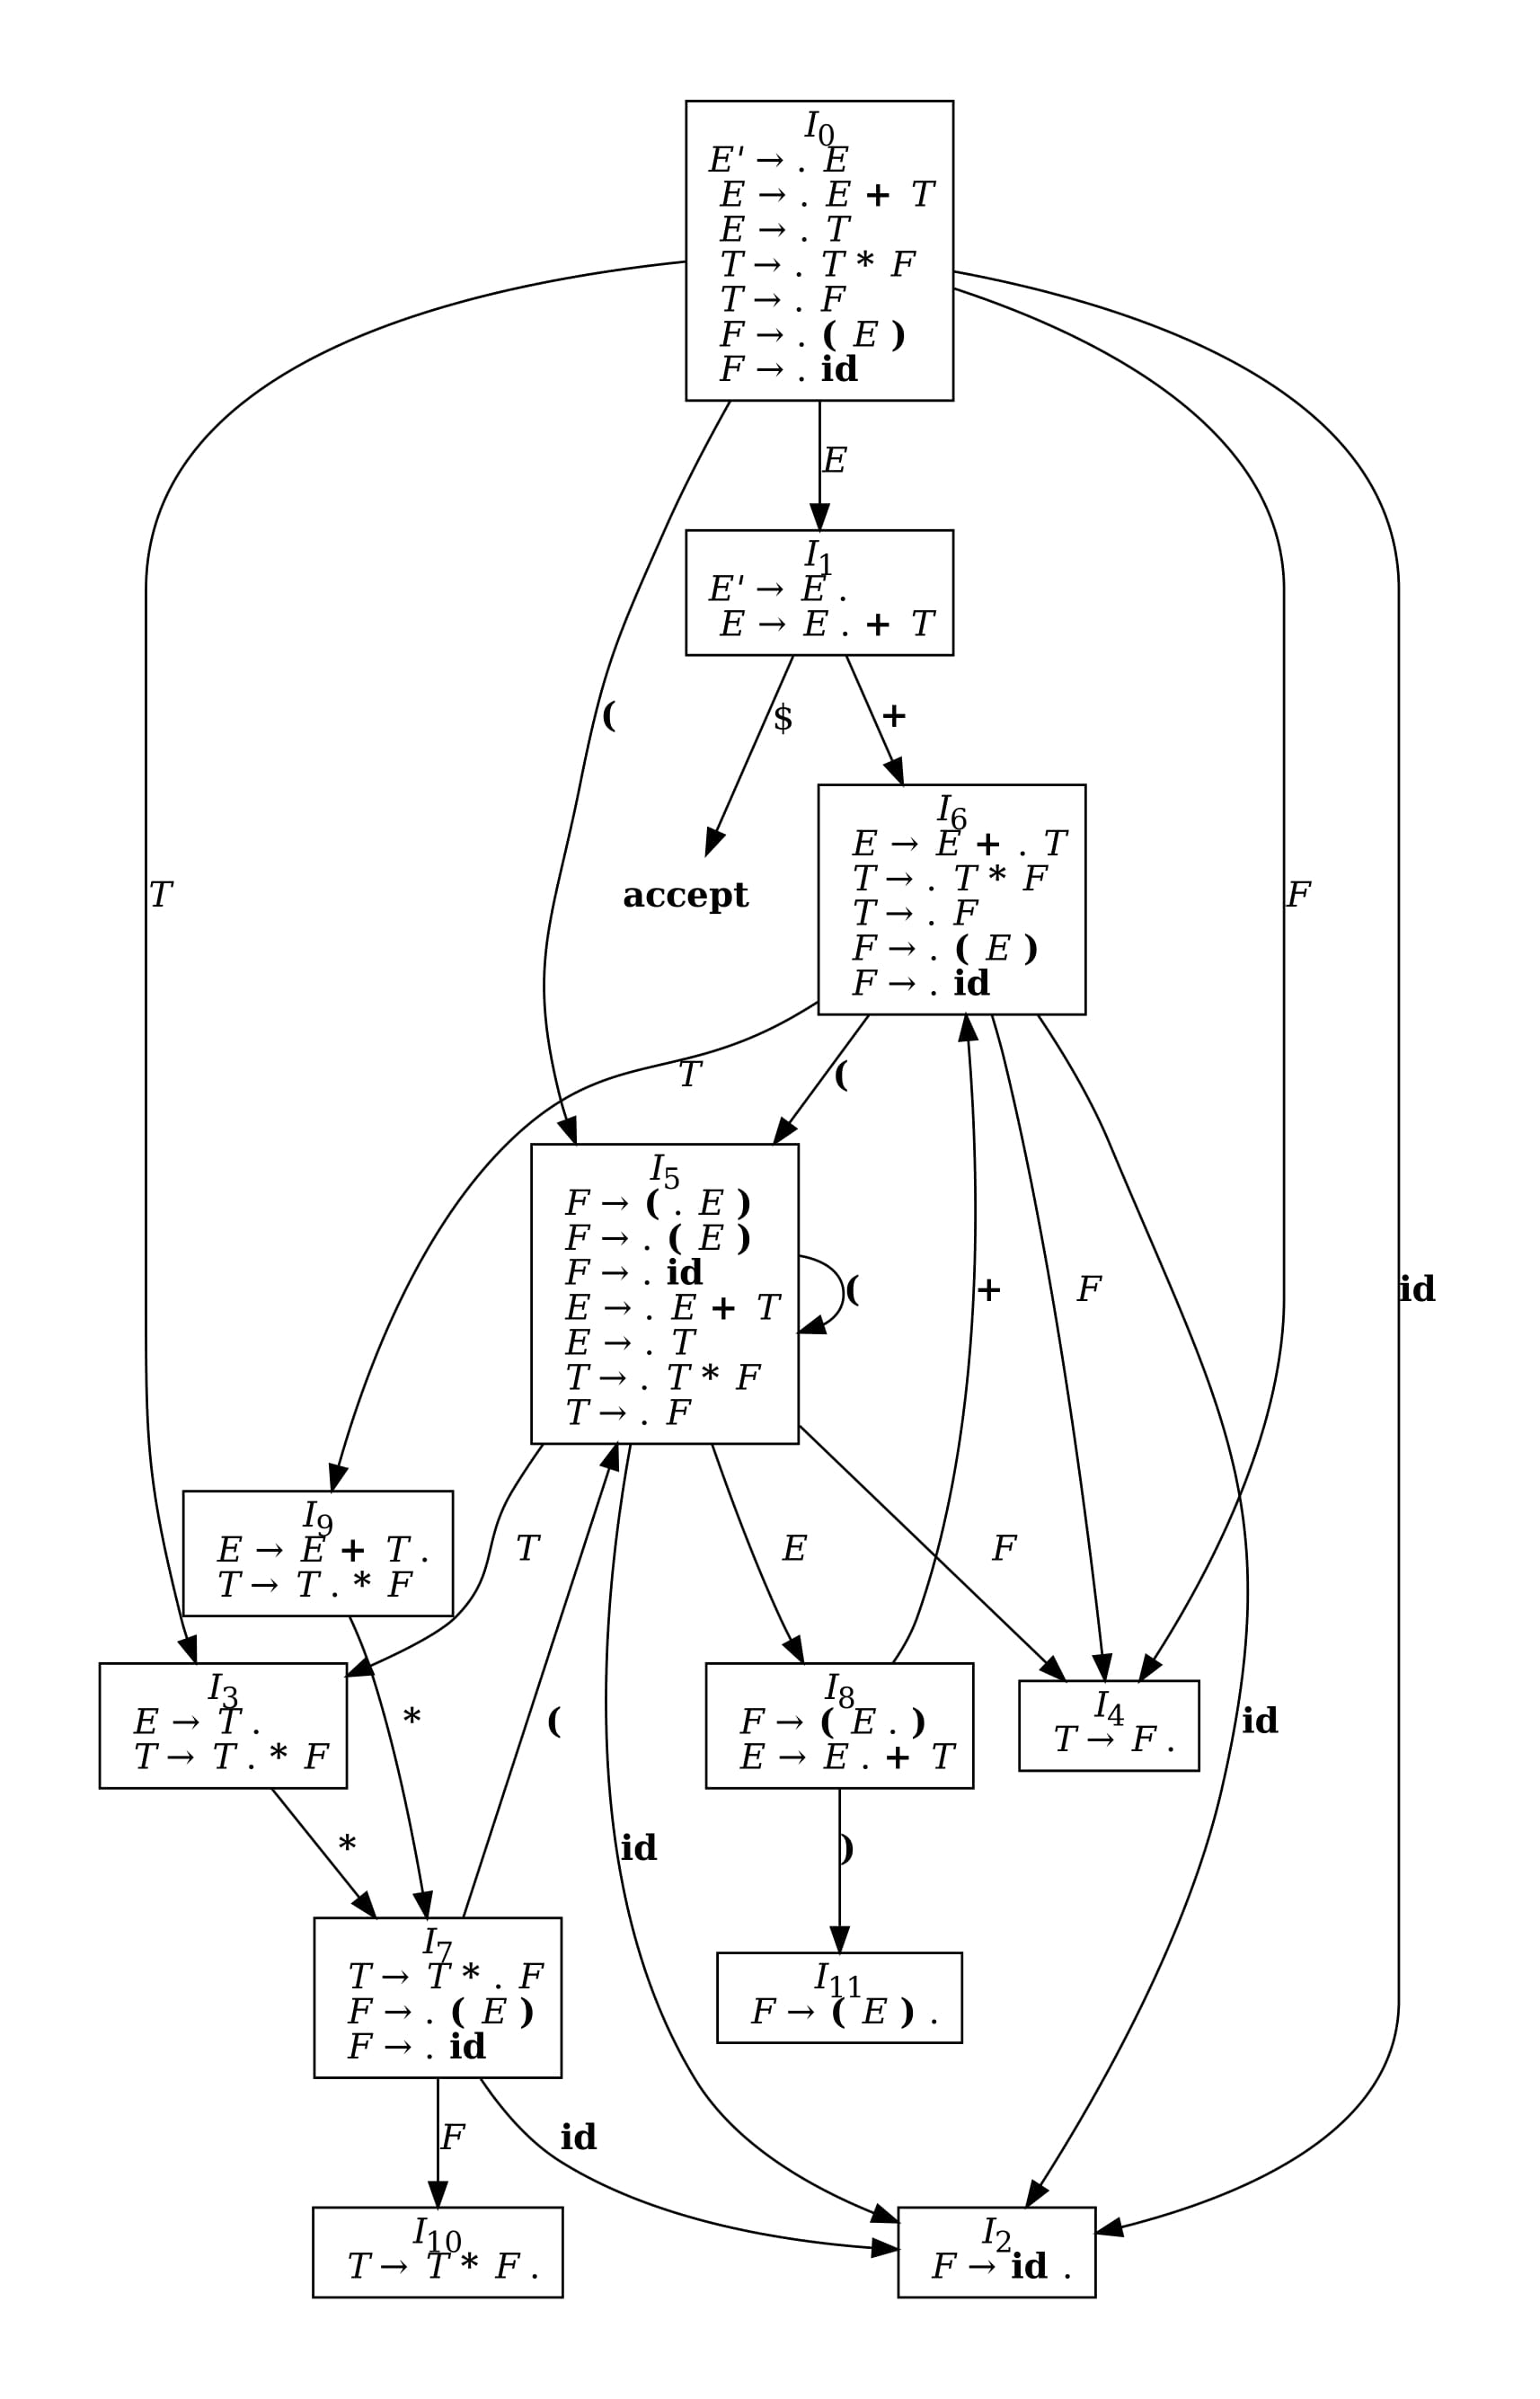

In [5]:
Implementation based on LR(0)

# Grammar
E'-> E    (1)
E -> E+T  (2)
E -> E-T  (3)
E -> T    (4)
T -> T*N  (5)
T -> T/N  (6)
T -> N    (7)

# First | Follow
   | First | Follow
-  |   -   |   -
E' |   N   |   $
E  |   N   | $,+,-
T  |   N   | $,*,/,+,-

# DFA

           N      +---S12---+ <--------------------------+
      +---------> | T -> N. | <-----------+      N       |
      |           +---------+       N     |              |
      |                                   |              |
+----S1-----+     +----S2-----+         + |         +----S4-----+  T   +-----S6----+
| E'-> .E   | E   | E'-> E.   |-----------|-------> | E -> E+.T | ---> | E -> E+T. | -+
| E -> .E+T |---> | E -> E.+T | -   +----S5-----+   | T -> .T*N |      | T -> T.*N |  |
| E -> .E-T |     | E -> E.-T |---> | E -> E-.T |   | T -> .T/N |      | T -> T./N | ---+
| E -> .T   |     +-----------+     | T -> .T*N |   | T -> .N   |      +-----------+  | |
| T -> .T*N |     +----S3-----+     | T -> .T/N |   +-----------+  T   +-----S7----+  | |
| T -> .T/N | T   | E -> T.   |     | T -> .N   | -------------------> | E -> E-T. |  | |
| T -> .N   |---> | T -> T.*N |     +-----------+                      | T -> T.*N |  | |
+-----------+     | T -> T./N |                                        | T -> T./N |  | |
                  +-----------+                                        +-----------+  | |
                     |     |   *                   +----S8-----+      *    |   |      | |
                     |     +---------------------> | T -> T*.N | <---------+ * |      | |
                     |                             +-----------+ <-------------|------+ |
                     |      /       +----S9-----+        |       /             |        |
                     +------------> | T -> T/.N | <------|---------------------+        |
                                    +-----------+ <------|------------------------------+
                                        N ↓            N ↓       /
                                    +----S11----+ +----S10----+
                                    | T -> T/N. | | T -> T*N. |
                                    +-----------+ +-----------+
# Parsing Table
+--------+-----------------------------------------------------+-----------------+
|        |                       ACTION                        |       GOTO      |
| STATE  +--------+--------+--------+--------+--------+--------+--------+--------+
|        |    N   |    +   |    -   |    *   |    /   |    $   |    E   |    T   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   1    |   s12  |        |        |        |        |        |    2   |    3   |
|   2    |        |   s4   |   s5   |        |        | r1(acc)|        |        |
|   3    |   r4   |   r4   |   r4   |   s8   |   s9   |   r4   |        |        |
|   4    |   s12  |        |        |        |        |        |        |    6   |
|   5    |   s12  |        |        |        |        |        |        |    7   |
|   6    |   r2   |   r2   |   r2   |   s8   |   s9   |   r2   |        |        |
|   7    |   r3   |   r3   |   r3   |   s8   |   s9   |   r3   |        |        |
|   8    |   s10  |        |        |        |        |        |        |        |
|   9    |   s11  |        |        |        |        |        |        |        |
|   10   |   r5   |   r5   |   r5   |   r5   |   r5   |   r5   |        |        |
|   11   |   r6   |   r6   |   r6   |   r6   |   r6   |   r6   |        |        |
|   12   |   r7   |   r7   |   r7   |   r7   |   r7   |   r7   |        |        |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+

# Example
+------+--------------+-------------+----------------+----------------------+
|      |    STACK     |   SYMBOLS   |     INPUT      |        ACTION        |
+------+--------------+-------------+----------------+----------------------+
|  (1) | 1            |             | 14 - 24 / 12 $ | shift                |
|  (2) | 1 12         |  N          |    - 24 / 12 $ | reduce by T -> N     |
|  (3) | 1 3          |  T          |    - 24 / id $ | reduce by E -> T     |
|  (4) | 1 2          |  E          |    - 24 / 12 $ | shift                |
|  (4) | 1 2 5        |  E -        |      24 / 12 $ | shift                |
|  (5) | 1 2 5 12     |  E - N      |         / 12 $ | reduce by T -> N     |
|  (6) | 1 2 5 7      |  E - T      |         / 12 $ | shift                |
|  (7) | 1 2 5 7 9    |  E - T /    |           12 $ | shift                |
|  (8) | 1 2 5 7 9 11 |  E - T / N  |              $ | reduce by T -> T / N |
|  (9) | 1 2 5 7      |  E - T      |              $ | reduce by E -> E - T |
| (10) | 1 2          |  E          |              $ | accept               |
+------+--------------+-------------+----------------+----------------------+
"""
# (number of popped symb, derived symb)
reduce_rules = {
    1: (0, 'Done'),
    2: (3, 'E'),
    3: (3, 'E'),
    4: (1, 'E'),
    5: (3, 'T'),
    6: (3, 'T'),
    7: (1, 'T')
}

# negative => reduce / positive => shift
parsing_table = {
    1: {'N': 12, 'E': 2, 'T': 3},
    2: {'+': 4, '-': 5, '$': -1},
    3: {'+': -4, '-': -4, '$': -4, '*': 8, '/': 9, 'N': -4},
    4: {'N': 12, 'T': 6},
    5: {'N': 12, 'T': 7},
    6: {'+': -2, '-': -2, '$': -2, '*': 8, '/': 9, 'N': -2},
    7: {'+': -3, '-': -3, '$': -3, '*': 8, '/': 9, 'N': -3},
    8: {'N': 10},
    9: {'N': 11},
    10:{'+': -5, '-': -5, '$': -5, '*': -5, '/': -5, 'N': -5},
    11:{'+': -6, '-': -6, '$': -6, '*': -6, '/': -6, 'N': -6},
    12:{'+': -7, '-': -7, '$': -7, '*': -7, '/': -7, 'N': -7},
}

https://github.com/Vipul97/slr-parser

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

In [ ]:
class ParserLR0:
    def __init__(self, E: str) -> None:
        self.E = E
        self.pos = 0
        self.states = [1]  # set initial state to 1
        self.symbs = []
        
    def symb2key(self, symb: str) -> str:
        # raw symb can only be either '+-*/' or 'N'
        return symb if symb in ['$', '+', '-', '*', '/'] else 'N'

    def parse(self):
        while True:
            symb = self.E[self.pos]
            nxt_state = parsing_table[self.states[-1]][self.symb2key(symb)]
            if nxt_state > 0:
                # shift
                self.states.append(nxt_state)
                self.symbs.append(symb)
                self.pos += 1
            else:
                # reduce
                pop_n, derived_symb = reduce_rules[-nxt_state]
                if pop_n == 0:
                    # assume all input is valid, symbs will leave the answer
                    return self.symbs[0]
                else:
                    if pop_n == 1:  # simple reduction
                        # reduce states
                        self.states.pop()
                        self.states.append(parsing_table[self.states[-1]][derived_symb])
                        # derivation
                        # Since reduce from T -> N and E -> T don't change the symbol value
                        # namely, self.symbs.append(self.symbs.pop()) == pass
                    elif pop_n == 3:  # operator reduction
                        # reduce states
                        self.states = self.states[:-2]  # pop 2 states
                        # derivation: get lval, operator, and rval => calculate the result
                        lval, operator, rval = self.symbs[-3:]
                        self.symbs = self.symbs[:-3]  # pop 3 symbols
                        if operator == '+':
                            self.symbs.append(lval + rval)
                        elif operator == '-':
                            self.symbs.append(lval - rval)
                        elif operator == '*':
                            self.symbs.append(lval * rval)
                        elif operator == '/':
                            self.symbs.append(lval // rval)


class Solution:    
    def lexer(self, s: str) -> List[str]:
        symbs, idx = [], 0
        while idx < len(s):
            if s[idx] in '+-*/':
                symbs.append(s[idx])
                idx += 1
            elif s[idx] in '1234567890':
                num_pat = s[idx]
                idx += 1
                while idx < len(s) and s[idx] in '1234567890':
                    num_pat += s[idx]
                    idx += 1
                symbs.append(int(num_pat))
            else:
                idx += 1
        symbs.append('$')
        return symbs
    
    def calculate(self, s: str) -> int:
        return ParserLR0(self.lexer(s)).parse()

In [ ]:
https://leetcode.com/problems/basic-calculator-ii/discuss/1069679/Python-Lexer-%2B-Operator-Precedence-Parser-with-steps

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        # Function to find precedence of operators.
        def precedence(op):
            if op == '+' or op == '-':
                return 1
            if op == '*' or op == '/':
                return 2
            return 0

        # Function to perform arithmetic operations.
        def applyOp(a, b, op):
            if op == '+': return a + b
            if op == '-': return a - b
            if op == '*': return a * b
            if op == '/': return a // b

        # Main implementation
        tokens = s
        
        values = [] # stack to store integer values.
        ops = []    # stack to store operators.
        i = 0
        while i < len(tokens):
            if tokens[i] == ' ':  # Current token is a whitespace,
                i += 1
                continue
            elif tokens[i].isdigit():  # Current token is a number, push it to stack for numbers.
                val = 0
                while (i < len(tokens) and tokens[i].isdigit()):  # may be more than one digits in the number.
                    val = (val * 10) + int(tokens[i])
                    i += 1
                values.append(val)
                continue
            elif tokens[i] == '(':  # Current token is an opening brace, push it to 'ops'
                ops.append(tokens[i])
            elif tokens[i] == ')':     # Closing brace encountered, solve entire brace.
                while len(ops) != 0 and ops[-1] != '(':
                    val2 = values.pop()
                    val1 = values.pop()
                    op = ops.pop()
                    values.append(applyOp(val1, val2, op))
                ops.pop()             # pop opening brace.
            else:                     # Current token is an operator.
                # While top of 'ops' has same or greater precedence to current operator. 
                # Apply operator on top of 'ops' to top two elements in values stack.
                while (len(ops) != 0 and precedence(ops[-1]) >= precedence(tokens[i])):
                    val2 = values.pop()
                    val1 = values.pop()
                    op = ops.pop()
                    values.append(applyOp(val1, val2, op))
                # Push current token to 'ops'.
                ops.append(tokens[i])

            i += 1

        # Entire expression has been parsed at this point, apply remaining ops to remaining values.
        while len(ops) != 0:
            val2 = values.pop()
            val1 = values.pop()
            op = ops.pop()
            values.append(applyOp(val1, val2, op))

        # Top of 'values' contains result, return it.
        return values[-1]

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        s = s.replace(' ', '')
    
        def get_number(s, i):
            val = 0
            while (i < len(s) and s[i].isdigit()):  # may be more than one digits in the number.
                val = (val * 10) + int(s[i])
                i += 1
            return val, i-1
            
        values = []                 # stack to store integer values to be summed
        
        i = 0
        while i < len(s):
            if s[i].isdigit():     
                val, i = get_number(s, i)
                values.append(val)
            elif s[i] == '*':   
                val1 = values.pop(-1)
                val2, i = get_number(s, i+1)
                values.append(val1 * val2)
            elif s[i] == '/':
                val1 = values.pop(-1)
                val2, i = get_number(s, i+1)
                if val1 >= 0:       # -3//2=-2, -(3//2)=-1
                    values.append(val1 // val2)
                else:
                    values.append(-((-val1) // val2))
            elif s[i] == '+':
                val, i = get_number(s, i+1)
                values.append(val)
            else:
                val, i = get_number(s, i+1)
                values.append(-val)
            i += 1
        return sum(values)

blob:https://leetcode.com/204f066f-9421-4eed-b5ad-6c3c5a86aafb

## Solution
Overview
There are multiple variations of this problem like Basic Calculator and Basic Calculator III. This problem is relatively simpler to solve, as we don't have to take care of the parenthesis.

The aim is to evaluate the given mathematical expression by applying the basic mathematical rules. The expressions are evaluated from left to right and the order of evaluation depends on the Operator Precedence. Let's understand how we could implement the problem using different approaches.

Approach 1: Using Stack
Intuition

We know that there could be 4 types of operations - addition (+), subtraction (-), multiplication (*) and division (/). Without parenthesis, we know that, multiplication (*) and (\) operations would always have higher precedence than addition (+) and subtraction (-) based on operator precedence rules.

img

If we look at the above examples, we can make the following observations -

If the current operation is addition (+) or subtraction (-), then the expression is evaluated based on the precedence of the next operation.
In example 1, 4+3 is evaluated later because the next operation is multiplication (3*5) which has higher precedence. But, in example 2, 4+3 is evaluated first because the next operation is subtraction (3-5) which has equal precedence.

If the current operator is multiplication (*) or division (/), then the expression is evaluated irrespective of the next operation. This is because in the given set of operations (+,-,*,/), the * and / operations have the highest precedence and therefore must be evaluated first.
In the above example 2 and 3, 4*3 is always evaluated first irrespective of the next operation.

Using this intuition let's look at the algorithm to implement the problem.

## Algorithm

Scan the input string s from left to right and evaluate the expressions based on the following rules

If the current character is a digit 0-9 ( operand ), add it to the number currentNumber.
Otherwise, the current character must be an operation (+,-,*, /). Evaluate the expression based on the type of operation.
Addition (+) or Subtraction (-): We must evaluate the expression later based on the next operation. So, we must store the currentNumber to be used later. Let's push the currentNumber in the Stack.
Stack data structure follows Last In First Out (LIFO) principle. Hence, the last pushed number in the stack would be popped out first for evaluation. In addition, when we pop from the stack and evaluate this expression in the future, we need a way to determine if the operation was Addition (+) or Subtraction (-). To simplify our evaluation, we can push -currentNumber in a stack if the current operation is subtraction (-) and assume that the operation for all the values in the stack is addition (+). This works because (a - currentNumber) is equivalent to (a + (-currentNumber)).

Multiplication (*) or Division (/): Pop the top values from the stack and evaluate the current expression. Push the evaluated value back to the stack.
Once the string is scanned, pop from the stack and add to the result.

Current
1 / 12
Implementation


## Complexity Analysis

Time Complexity: \mathcal{O}(n)O(n), where nn is the length of the string ss. We iterate over the string ss at most twice.

Space Complexity: \mathcal{O}(n)O(n), where nn is the length of the string ss.

Approach 2: Optimised Approach without the stack
Intuition

In the previous approach, we used a stack to track the values of the evaluated expressions. In the end, we pop all the values from the stack and add to the result. Instead of that, we could add the values to the result beforehand and keep track of the last calculated number, thus eliminating the need for the stack. Let's understand the algorithm in detail.

### Algorithm

The approach works similar to Approach 1 with the following differences :

Instead of using a stack, we use a variable lastNumber to track the value of the last evaluated expression.
If the operation is Addition (+) or Subtraction (-), add the lastNumber to the result instead of pushing it to the stack. The currentNumber would be updated to lastNumber for the next iteration.
If the operation is Multiplication (*) or Division (/), we must evaluate the expression lastNumber * currentNumber and update the lastNumber with the result of the expression. This would be added to the result after the entire string is scanned.

# About eval() in python
#### The eval() method parses the expression passed to this method and runs python expression (code) within the program.



In [ ]:
eval(expression, globals=None, locals=None)

## eval() Parameters
The eval() function takes three parameters:

expression - the string parsed and evaluated as a Python expression
globals (optional) - a dictionary
locals (optional)- a mapping object. Dictionary is the standard and commonly used mapping type in Python.
The use of globals and locals will be discussed later in this article.

# Return Value from eval()
The eval() method returns the result evaluated from the expression.


In [7]:
x =1
print(eval('x + 1'))

2


In [8]:
def calculatePerimeter(l):
    return 4*l
def calculateArea(l):
    return l*l

expression = input("Type a function: ")

for l in range(1, 5):
    if(expression == 'calculatePerimeter(l)'):
        print("If length is ", l, ", Perimeter = ", eval(expression))
    elif (expression == 'calculateArea(l)'):
        print("If length is ", l, ", Area = ", eval(expression))
    else:
        print('Wrong Function')
        break

Type a function: calculateArea(l)
If length is  1 , Area =  1
If length is  2 , Area =  4
If length is  3 , Area =  9
If length is  4 , Area =  16


## Warnings when using eval()
Consider a situation where you are using a Unix system (macOS, Linux etc) and you have imported the os module. The os module provides a portable way to use operating system functionalities like reading or writing to a file.

If you allow users to input a value using eval(input()), the user may issue commands to change file or even delete all the files using the command: os.system('rm -rf *').

If you are using eval(input()) in your code, it is a good idea to check which variables and methods the user can use. You can see which variables and methods are available using dir() method.

In [9]:
from math import *
print(eval('dir()'))

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'calculateArea', 'calculatePerimeter', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exit', 'exp', 'expm1', 'expression', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'get_ipython', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'l', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'perm', 'pi', 'pow', 'prod', 'quit', 'radians', 'remainder', 's', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'x']


## Restricting the Use of Available Methods and Variables in eval()
More often than not, all the available methods and variables used in the expression (first parameter to eval()) may not be needed, or even may have a security hole. You may need to restrict the use of these methods and variables for eval(). You can do so by passing optional globals and locals parameters (dictionaries) to the eval() function.

1. When both globals and locals parameters omitted
If both parameters are omitted (as in our earlier examples), the expression is executed in the current scope. You can check the available variables and methods using following code:

In [10]:
print(eval('dir()'))

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i2', '_i3', '_i4', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'calculateArea', 'calculatePerimeter', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exit', 'exp', 'expm1', 'expression', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'get_ipython', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'l', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'perm', 'pi', 'pow', 'prod', 'quit', 'radians', 'remainder', 's', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'x']


# . Passing globals parameter; locals parameter is omitted
The globals and locals parameters (dictionaries) are used for global and local variables respectively. If the locals dictionary is omitted, it defaults to globals dictionary. Meaning, globals will be used for both global and local variables.

Note: You can check the current global and local dictionary in Python using globals() and locals() built-in methods respectively.

Example 3: Passing empty dictionary as globals parameter


In [13]:
from math import *
print(eval('dir()', {}))
print(eval('sqrt(25)', {}))


['__builtins__']


NameError: name 'sqrt' is not defined

If you pass an empty dictionary as globals, only the __builtins__ are available to expression (first parameter to the eval()).

Even though we have imported the math module in the above program, expression can't access any functions provided by the math module.

### Example 4: Making Certain Methods available

In [14]:
from math import *
print(eval('dir()', {'sqrt': sqrt,'pow':pow}))

['__builtins__', 'pow', 'sqrt']


Here, the expression can only use the sqrt() and the pow() methods along with __builtins__.

It is also possible to change the name of the method available for the expression as to your wish:


In [15]:
from math import *
names = {'square_root': sqrt,'power':pow}
print(eval('dir()', names))

['__builtins__', 'power', 'square_root']


In [16]:
print(eval('square_root(9)', names))

3.0


In the above program, square_root() calculates the square root using sqrt(). However, trying to use sqrt() directly will raise an error.

### Example 5: Restricting the Use of built-ins
You can restrict the use of __builtins__ in the expression as follows:

In [18]:
eval(expression, {'__builtins__': None})

### 3. Passing both globals and locals dictionary
You can make needed functions and variables available for use by passing the locals dictionary. For exampl

In [19]:
from math import *
a = 169
print(eval('sqrt(a)', {'__builtins__': None}, {'a':a, 'sqrt':sqrt}))

13.0


In this program, expression can have sqrt() method and variable a only. All other methods and variables are unavailable.

Restricting the use of eval() by passing globals and locals dictionaries will make your code secure particularly when you are using input provided by the user to the eval() method.

Note: Sometimes, eval() is not secure even with limited names. When an object and its methods are made accessible, almost anything can be done. The only secure way is by validating the user input.

# Binary Prefix Divisible By 5

Given an array A of 0s and 1s, consider N_i: the i-th subarray from A[0] to A[i] interpreted as a binary number (from most-significant-bit to least-significant-bit.)

Return a list of booleans answer, where answer[i] is true if and only if N_i is divisible by 5.

Example 1:

Input: [0,1,1]
Output: [true,false,false]
Explanation: 
The input numbers in binary are 0, 01, 011; which are 0, 1, and 3 in base-10.  Only the first number is divisible by 5, so answer[0] is true.
Example 2:

Input: [1,1,1]
Output: [false,false,false]
Example 3:

Input: [0,1,1,1,1,1]
Output: [true,false,false,false,true,false]
Example 4:

Input: [1,1,1,0,1]
Output: [false,false,false,false,false]

In [ ]:
def prefixesDivBy5(self, A: List[int]) -> List[bool]:
	answer = []
	l = len(A)
	num = 0

	for i in range(0, l):
		if A[i]==0 and not num:
			answer.append(True)
		else:
			num = ((num*2)+(A[i]==1))%5
			if not num:
				answer.append(True)
			else:
				answer.append(False)
	return answer

In [ ]:
isDivisible = [False for i in range(len(A))]
result = A[0]
isDivisible[0] = True if result % 5 == 0 else False
for i in range(1, len(A)):
result = 2 * result + A[i]
isDivisible[i] = True if result % 5 == 0 else False

    return isDivisible

In [ ]:
# best solution
class Solution:
    def prefixesDivBy5(self, A: List[int]) -> List[bool]:
        answer = [None] * len(A)
        S = 0
        for idx, i in enumerate(A):
            S <<= 1                           # bit shift left
            S += i                            # add new least-sig bit
            S %= 5                            # mod math to keep S small (big speed-up)
            answer[idx] = S == 0
        return answer

In [ ]:
class Solution:
    def prefixesDivBy5(self, A: List[int]) -> List[bool]:
        lis = []
        st = ""
        for i in range(len(A)):
            st = st+str(A[i])
            lis.append(int(st,2)%5 == 0)
        return lis
                

In [ ]:
class Solution:
    def prefixesDivBy5(self, A: List[int]) -> List[bool]:   
        lst, num=[],  0        
        for i in A:
            num=num*2+i
            lst.append(num %5==0)
            
        return lst